# Spooky Author Identification: Data Exploration and Model 
I had participated in this kaggle competition with UBC's Scientific Software Seminar run by Patrick Walls. I would like to thank both Patrick and Mike Irvine whom hosted each seminar. This competition with them was largely the culmination of what we have learned throughout the year. Their websites can be find [here](https://www.math.ubc.ca/~pwalls/) and [here.](https://sempwn.github.io/).

A Link to this kaggle competition can be found [here.](https://www.kaggle.com/c/spooky-author-identification)

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np 
from collections import Counter

In [12]:
df_train = pd.read_csv('data/train.csv')

In [13]:
df_train.head(15)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


Here we can see given a excerpt from a text we must predict which author wrote that particular excerpt. The 3 authors we must select from are Edgar Allan Poe, Mary Shelley, and HP Lovecraft. 

### feature #1: string length of each text

In [14]:
df_train['text'].str.len().head(20)

0     231
1      71
2     200
3     206
4     174
5     468
6     128
7      43
8     488
9     144
10    107
11     63
12     87
13     86
14     48
15    261
16    340
17    173
18    270
19    305
Name: text, dtype: int64

In [15]:
df_train['text_length'] = df_train['text'].str.len()
df_train.head(20)

,id,text,author,text_length
0,id26305,"This process, however, afforded me no means of...",EAP,231
1,id17569,It never once occurred to me that the fumbling...,HPL,71
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174
5,id22965,"A youth passed in solitude, my best years spen...",MWS,468
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,128
7,id13515,The surcingle hung in ribands from my body.,EAP,43
8,id19322,I knew that you could not say to yourself 'ste...,EAP,488
9,id00912,I confess that neither the structure of langua...,MWS,144


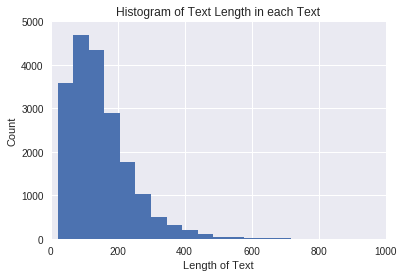

In [16]:
plt.hist(df_train['text_length'],
        bins = 100);
plt.axis([0,1000,0,5000]);
plt.xlabel('Length of Text');
plt.ylabel('Count');
plt.title('Histogram of Text Length in each Text');

### feature #2  : number of words in each text 
note: the split function defines a word as a group of strings that is enclosed by spaces. Then it places and seperates each words in a new array. The apply(len) counts the size of this array.

In [17]:
df_train['text'].str.split().apply(len).head(20)

0     41
1     14
2     36
3     34
4     27
5     83
6     21
7      8
8     88
9     23
10    22
11    10
12    15
13    15
14    10
15    47
16    61
17    28
18    48
19    48
Name: text, dtype: int64

In [18]:
df_train['num_words'] = df_train['text'].str.split().apply(len)
df_train.head(20)

,id,text,author,text_length,num_words
0,id26305,"This process, however, afforded me no means of...",EAP,231,41
1,id17569,It never once occurred to me that the fumbling...,HPL,71,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,27
5,id22965,"A youth passed in solitude, my best years spen...",MWS,468,83
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,128,21
7,id13515,The surcingle hung in ribands from my body.,EAP,43,8
8,id19322,I knew that you could not say to yourself 'ste...,EAP,488,88
9,id00912,I confess that neither the structure of langua...,MWS,144,23


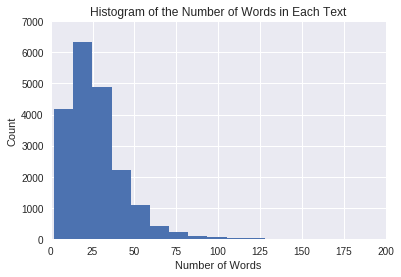

In [19]:
plt.hist(df_train['num_words'],
        bins = 75);
plt.title('Histogram of the Number of Words in Each Text');
plt.xlabel('Number of Words');
plt.ylabel('Count');
plt.axis([0,200,0,7000]);

### Find the Most Frequent Words for Each Author 

We need to download and import the nltk data manually. Do this with the following two commands: 

* 1. import nltk 
* 2. nltk.download()

Follow the instructions accordingly.

In [ ]:
import nltk
from string import punctuation

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
for author in df_train['author'].unique():
    ct = Counter()
    df = df_train[df_train['author'] == author]
    df['text'].str.lower().str.split().apply(ct.update)
    for stopword in stopwords:
        del ct[stopword]
    result[author] = ct

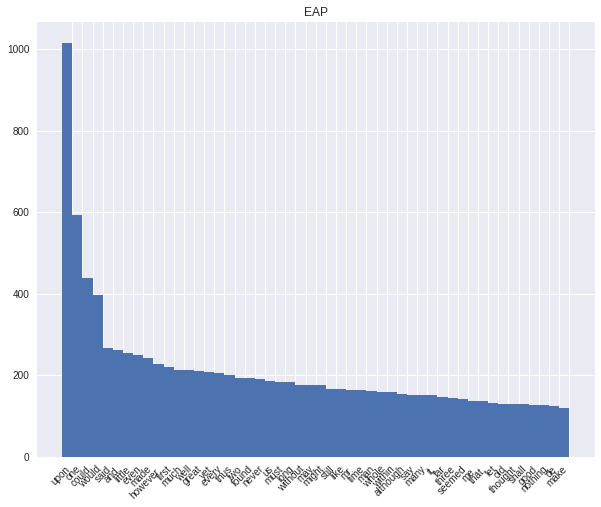

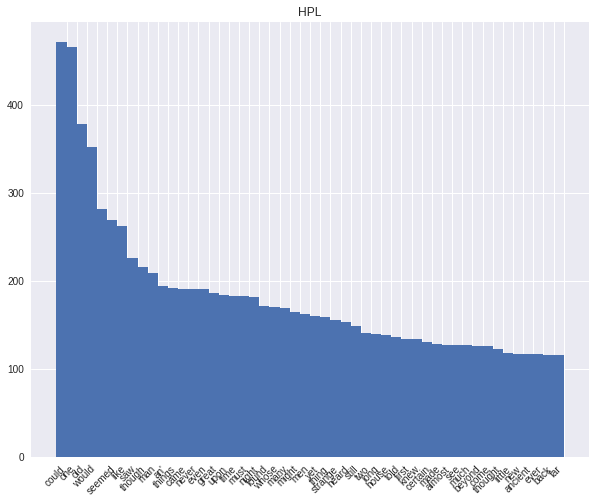

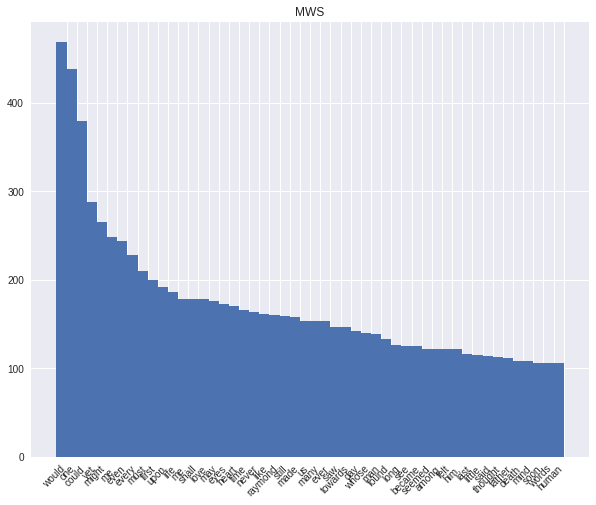

In [26]:
for author in df_train['author'].unique():
    labels, values = zip(*result[author].most_common(50))
    indexes = np.arange(len(labels))
    width = 1
    plt.figure(figsize=(10,8))
    plt.title(author)
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels,rotation=45,ha='right')

    plt.show()

## Implementing a Multinomial Naive Bayes Classifier 

### 1. Developing the Classifier 

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.feature_selection import SelectKBest, chi2

In [32]:
ct_vect = CountVectorizer()
x_train_counts = ct_vect.fit_transform(df_train['text'])
x_train_counts.shape

(19579, 25068)

In [35]:
tfidf_trans = TfidfTransformer()
x_train_tfidf = tfidf_trans.fit_transform(x_train_counts)
x_train_tfidf.shape

(19579, 25068)

In [36]:
clsf = MultinomialNB().fit(x_train_tfidf, df_train['author'])

In [47]:
clsf.classes_

array(['EAP', 'HPL', 'MWS'], 
      dtype='<U3')

### 2. Train Test Split 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'],
                                                   df_train['author'],
                                                   test_size = 0.33,
                                                   random_state = 42)

In [43]:
text_clsf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('chi2', SelectKBest(chi2, k=10000)),
                     ('clf', MultinomialNB()),
])

In [44]:
text_clsf.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...tion chi2 at 0x7f2dcc3682f0>)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
predict = text_clsf.predict(x_test)
y_predict = text_clsf.predict_proba(x_test)

In [46]:
np.mean(predict == y_test)

0.79340761374187563

In [52]:
log_loss(y_test,y_predict)

0.64437815529217424

This model will give us a submission score of 0.48 and this corresponds to 612 place